In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from shapely import wkt
from shapely.errors import WKTReadingError

C:\Users\stdio\AppData\Local\Temp\ipykernel_656\2245604195.py:9: DeprecationWarning: WKTReadingError is deprecated and will be removed in a future version. Use ShapelyError instead (functions previously raising {name} will now raise a ShapelyError instead).
  from shapely.errors import WKTReadingError


In [2]:
hechos = pd.read_excel('../dataset/homicidios.xlsx', sheet_name='HECHOS')
victimas = pd.read_excel('../dataset/homicidios.xlsx', sheet_name='VICTIMAS')
caba = gpd.read_file('../dataset/comunas.geojson')

In [3]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Se da el formato correcto a las columnas `pos x`, `pos y`,`HH` y `HORA`

In [4]:
hechos['pos x'] = pd.to_numeric(hechos['pos x'], errors='coerce')
hechos['pos y'] = pd.to_numeric(hechos['pos y'], errors='coerce')
hechos['HH'] = pd.to_numeric(hechos['HH'], errors='coerce')
hechos['HORA'] = pd.to_datetime(hechos['HORA'], format='%H:%M:%S', errors='coerce').dt.time

En la columna `XY (CABA)` se identifican los registros nulos que aparecen como `Point (. .)` 

In [5]:
hechos['XY (CABA)'].value_counts().index[0]

'Point (. .)'

Procesamos la columna y creamos el GeodataFrame `hechos`

In [6]:
# Reemplaza "Point" por "POINT" en la columna 'XY (CABA)
hechos['XY (CABA)'] = hechos['XY (CABA)'].str.replace("Point", "POINT")

# Inicializa una lista vacía para almacenar los puntos
lista = []

# Itera sobre cada fila en la columna 'XY (CABA)'
for i in range(len(hechos['XY (CABA)'])):
    try:
        # Intenta cargar el punto como un objeto de Shapely
        punto = wkt.loads(hechos['XY (CABA)'].iloc[i])
        lista.append(punto)
    except WKTReadingError:
        # Imprime el valor problemático
        print(f"Error al cargar el punto: {hechos['XY (CABA)'].iloc[i]}")
        # Añade un valor None a la lista para mantener el mismo número de filas
        lista.append(None)

# Reemplaza la columna 'XY (CABA)' con la lista de puntos
hechos['XY (CABA)'] = lista

# Convierte el DataFrame a un GeoDataFrame
hechos = gpd.GeoDataFrame(hechos, geometry='XY (CABA)', crs="EPSG:4326")


Error al cargar el punto: POINT (. .)
Error al cargar el punto: POINT (. .)
Error al cargar el punto: POINT (. .)
Error al cargar el punto: POINT (. .)
Error al cargar el punto: POINT (. .)
Error al cargar el punto: POINT (. .)
Error al cargar el punto: POINT (. .)
Error al cargar el punto: POINT (. .)
Error al cargar el punto: POINT (. .)
Error al cargar el punto: POINT (. .)
Error al cargar el punto: POINT (. .)
Error al cargar el punto: POINT (. .)
Error al cargar el punto: POINT (. .)
Error al cargar el punto: POINT (. .)


In [13]:
hechos = gpd.GeoDataFrame(hechos, geometry=gpd.points_from_xy(hechos['pos y'], hechos['pos x']))

In [14]:
hechos.sample()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,geometry
682,2021-0084,1,2021-11-11,2021,11,11,03:00:00,3.0,TAPALQUE Y BRUIX AV.,AVENIDA,...,BRUIX AV.,TAPALQUE y BRUIX AV.,9,POINT (97421.40294 98160.56984),-58.491426,-34.645848,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO,POINT (-34.64585 -58.49143)


Crear GeodataFrame `caba`

In [7]:
caba = gpd.GeoDataFrame(caba, geometry='geometry', crs="EPSG:4326")

In [8]:
print(caba['geometry'].iloc[0])

MULTIPOLYGON (((-58.38000388556932 -34.57002352472016, -58.380024970259136 -34.57036706245847, -58.37983444925949 -34.57035204407306, -58.37952668412939 -34.57032778054889, -58.37952494281348 -34.57032764955402, -58.379523428151735 -34.570327535841095, -58.37952017217587 -34.570327289330315, -58.37951828048224 -34.570327148316984, -58.37951691619646 -34.570327046425255, -58.37951365912728 -34.57032680351933, -58.37951040205454 -34.57032656421913, -58.37950811262888 -34.57032639048249, -58.37950715261646 -34.57032631861392, -58.37950389554915 -34.57032607390485, -58.37950386067933 -34.57032607117673, -58.379500639569805 -34.570325830999344, -58.37949876313294 -34.57032568999612, -58.37949738467579 -34.57032559260172, -58.37949462777581 -34.57032538338975, -58.379494129789855 -34.57032534609101, -58.37949087054129 -34.570325103182974, -58.37948871514336 -34.57032494305907, -58.37948761347316 -34.570324859374956, -58.37948435858549 -34.570324614666866, -58.37948110369784 -34.5703243699586

In [9]:
print(hechos['XY (CABA)'].iloc[0])

POINT (98896.78238426 93532.43437792)


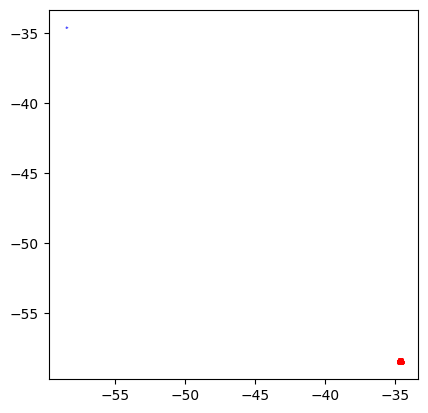

In [15]:
fig, ax = plt.subplots()

# Comunas
caba.plot(ax=ax, color='blue')

# Incidentes
hechos.plot(ax=ax, color='red', markersize=5)

plt.show()


In [ ]:
hechos